# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [18]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [32]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

In [ ]:
# Import Data

In [33]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
sfo_data_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(sfo_data_path, index_col="year")

locations_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(locations_path)


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [34]:
figHousingUnits = sfo_data['housing_units'].groupby('year').mean()

salesRent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()

salesRent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()

sfoDF = sfo_data.groupby(['year', 'neighborhood']).mean()

mostExpensive = sfo_data.groupby('neighborhood').mean().sort_values(ascending=False, by='sale_price_sqr_foot')

mostExpensive2 = mostExpensive.reset_index().round(decimals=2)


# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    minUnits = min(figHousingUnits)
    maxUnits = max(figHousingUnits)
    stdUnits = figHousingUnits.std()
    
    housingPlot = plt.bar(
            figHousingUnits.index,
            figHousingUnits,
        )
    plt.ylim(
        (minUnits - stdUnits),
        (maxUnits + stdUnits)
    )
    plt.xlim(
        sfo_data.index[0],
        sfo_data.index[-1]
    )
    plt.suptitle(
        'Housing Units in San Francisco from 2010 to 2016',
        weight='bold'
    )
    plt.xlabel('Year')
    plt.ylabel('Housing Units')
        
    return housingPlot


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    grossRentPlot = plt.plot(
                salesRent.index, 
                salesRent['gross_rent']
            )
    plt.xlim(
        salesRent.index[0],
        salesRent.index[-1]
    )
    plt.suptitle(
        'Average Gross Rent in San Francisco',
        weight='bold'
    )
    plt.xlabel('Year')
    plt.ylabel('Gross Rent')
    
    return grossRentPlot

def average_sales_price():
    """Average Sales Price Per Year."""
    
    salesPlot = plt.plot(
        salesRent.index,
        salesRent['sale_price_sqr_foot']
    )
    plt.xlim(
        salesRent.index[0],
        salesRent.index[-1]
    )
    plt.suptitle(
        'Average Sale Price per Square Foot in San Francisco',
        weight='bold')
    plt.xlabel('Year')
    plt.ylabel('Avg. Sale Price')
    
    return salesPlot

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    priceNeighborhoodPlot = sfoDF['sale_price_sqr_foot'].hvplot(
        xlabel='year',
        ylabel='average sale per square foot',
        label=' ',
        groupby='neighborhood',
        height=300,
        width=450
    )
    
    return priceNeighborhoodPlot

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    mostExpensivePlot = mostExpensive['sale_price_sqr_foot'].head(10).hvplot.bar(
        ylabel='average sale price per square foot',
        xlabel='neighborhood',
        label='top 10 most expensive neighborhoods',
        rot=40,
        height=400,
        width=650,
    )
    
    return mostExpensivePlot

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   

    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    coordinatesPlot = px.parallel_coordinates(
        mostExpensive.head(10),
        color='sale_price_sqr_foot'
    )
    
    return coordinatesPlot


def parallel_categories():
    """Parallel Categories Plot."""
    categoriesPlot = px.parallel_categories(
        mostExpensive2.head(10),
        color='sale_price_sqr_foot'
    )
    
    return categoriesPlot
    

def neighborhood_map():
    """Neighborhood Map."""
    neighborhoodCombined = mostExpensive2.join(
        df_neighborhood_locations.set_index('Neighborhood'),
        how='inner',
        on='neighborhood'
    )
    
    neigborhoodPlot = px.scatter_mapbox(
        neighborhoodCombined,
        lat="Lat",
        lon="Lon",
        size="gross_rent",
        color="neighborhood",
        zoom=10,
        title='neighborhoods by gross rent',
        height=800,
        width=1000,
    )
    
    return neigborhoodPlot


def neighborhood_map2():
    """Sunburst Plot."""
    
    neighborhoodCombined = mostExpensive2.join(
        df_neighborhood_locations.set_index('Neighborhood'),
        how='inner',
        on='neighborhood'
    )
    
    neigborhoodPlot = px.scatter_mapbox(
        neighborhoodCombined,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="neighborhood",
        zoom=10,
        title='neighborhoods by average sale price per square foot',
        height=800,
        width=1000,
    )
    
    return neigborhoodPlot


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

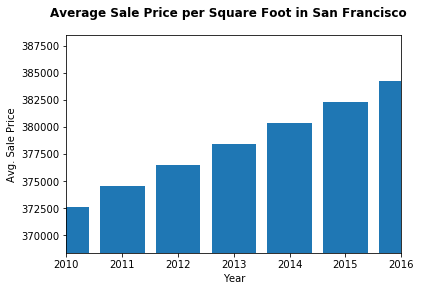

In [35]:
sf_market_plots = pn.Column(
    '## San Francisco housing market overview',
    housing_units_per_year(),
    average_gross_rent(),
    average_sales_price()
)

neighborhood_plots = pn.Column(
    '## San Francisco neighborhoods overview',
    average_price_by_neighborhood(),
    top_most_expensive_neighborhoods(),
    )

parallel_plots = pn.Column(
    '## Parallel plots',
    parallel_categories(),
    parallel_coordinates(),
)

neighborhood_maps = pn.Column(
    '## Neighborhood maps',
    neighborhood_map(),
    neighborhood_map2(),
)

dashboard = pn.Tabs(
    ('Housing market', sf_market_plots),
    ('Neighborhoods', neighborhood_plots),
    ('Parallels', parallel_plots),
    ('Neighborhood maps', neighborhood_maps),
)

## Serve the Panel Dashboard

In [36]:
dashboard.servable()


Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(BarContainer)
        [2] Str(list)
        [3] Str(list)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()